# Feeding the DeepL model 

based on: 

https://keras.io/preprocessing/image/

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

## Load Model

Imports and Data Preprocessing have to be executed, then the loaded model can be used for the Testing and Visualisation steps

In [1]:
# load modules 
import os
from keras.models import load_model

#specify directory
os.chdir('C:\\Users\\lsamsi\\Documents\\GitHub\\DLfM_BrandManagement')

Using TensorFlow backend.


In [2]:
model = load_model('./model/demo_model2.h5')

In [3]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4 (Model)              (None, 204800)            23587712  
_________________________________________________________________
dense_9 (Dense)              (None, 64)                13107264  
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 325       
Total params: 36,695,301
Trainable params: 13,107,589
Non-trainable params: 23,587,712
_________________________________________________________________
None


## Load Data

In [66]:
#specify directory
import os
os.chdir('C:\\Users\\lsamsi\\Documents\\GitHub\\DLfM_BrandManagement')

In [67]:
import numpy as np
npimgs = np.load('data/instagram_images/sanpellegrino_official_npimgs.npy')

In [68]:
npimgs.shape

(12, 300, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


First image: 


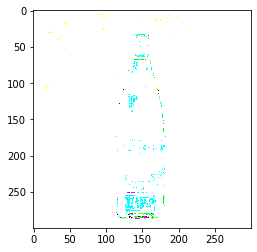

In [69]:
print('First image: ')
plt.imshow(npimgs[0])

## Feed Model

In [7]:
X_test = npimgs

In [11]:
y_pred = model.predict(X_test)

In [9]:
# functions
def probabilty_to_classencoding(y_pred):
        """
        Output of softmax is probability distribution, 
        But we need the one hot encoding vector based on the class of 
        highest probabilty. 
        This function converts output of sigmoid to output class one hot encoding form
        """
        y_class = np.array( y_pred )
        idx = np.argmax(y_class, axis=-1)
        y_class = np.zeros(y_class.shape )
        y_class[ np.arange(y_class.shape[0]), idx] = 1
        return y_class
def binary_class_to_label(binary_class):
        """
        Return the class value based on the one hot encoding vector
        """
        return(np.argmax(binary_class, axis=1))   

In [12]:
from sklearn.preprocessing import LabelEncoder

# convert from encoded label to label name 
label_encoder = LabelEncoder()
y_pred = probabilty_to_classencoding(y_pred)
y_pred = binary_class_to_label(y_pred)
#y_pred_labels = label_encoder.inverse_transform(y_pred)
print(y_pred)

<class 'numpy.ndarray'>


In [35]:
# encoded label 
y_pred_lst = y_pred.tolist()
print(y_pred_lst)

[0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0]


In [26]:
# map back to original label name 
code2label = {0: 'fun', 1: 'glamarous',2: 'healthy',3: 'negative'}
y_pred_lbnm = map(code2label.get, y_pred_lst)
y_pred_lbnm = list(y_pred_lbnm)
print(y_pred_lbnm)

['fun', 'fun', 'fun', 'glamarous', 'fun', 'healthy', 'fun', 'fun', 'fun', 'fun', 'fun', 'fun']


## Label to Images

there is not y_true, so we need to manually assess the quality of the categorization

In [71]:
#specify directory
import os
os.chdir('C:\\Users\\lsamsi\\Documents\\GitHub\\DLfM_BrandManagement\\data\\instagram_images\\sanpellegrino')

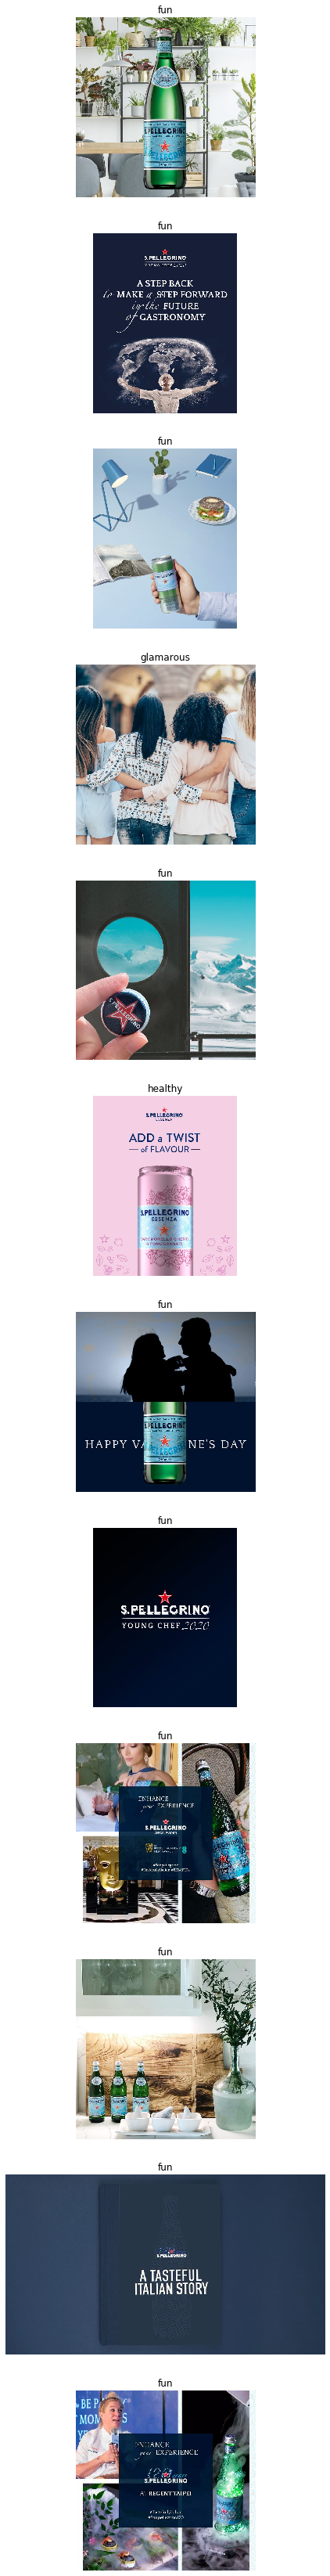

In [72]:
# load images and put labels in the title, plot here for assessment 

# load modules
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#your path 
images_dir = 'official/*.png'

#creating a collection with the available images
images = imread_collection(images_dir)

fig = plt.figure(figsize=(60,60))
for image in range(len(images)): 
    a = fig.add_subplot(len(images), 1, image+1)
    imgplot = plt.imshow(images[image])
    a.set_title(f'{y_pred_lbnm[image]}')
    plt.axis('off')



## Run Statistics

In [73]:
import pandas as pd
df = pd.Series(y_pred_lbnm).value_counts() 
print(df) 

fun          10
healthy       1
glamarous     1
dtype: int64


In [74]:
df = pd.Series(y_pred_lbnm).value_counts()       
print(round(df / len(y_pred_lbnm)*100, 2) )

fun          83.33
healthy       8.33
glamarous     8.33
dtype: float64
